# Tutoreil A Guide on Social Network Recommendation System

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Exploratory Data Analysis

##  1. A Directional Graph

In [35]:
import pandas as pd
train_df = pd.read_csv('train.csv')
print(train_df.head(10))
print(train_df.shape)

   source_node  destination_node
0            1            690569
1            1            315892
2            1            189226
3            2            834328
4            2           1615927
5            2           1194519
6            2            470294
7            2            961886
8            2            626040
9            3            176995
(9437519, 2)


## 2. Number of unique nodes and links

In [36]:
# Create a directed graph
G = nx.from_pandas_edgelist(train_df, source='source_node', target='destination_node', create_using=nx.DiGraph())


In [37]:
print(G)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Graph is directed: {G.is_directed()}")
print(f"First 5 nodes: {list(G.nodes)[:5]}")
print(f"First 5 edges: {list(G.edges)[:5]}")


DiGraph with 1862220 nodes and 9437519 edges
Number of nodes: 1862220
Number of edges: 9437519
Graph is directed: True
First 5 nodes: [1, 690569, 315892, 189226, 2]
First 5 edges: [(1, 690569), (1, 315892), (1, 189226), (690569, 663369), (690569, 603627)]


## 3. Number of followers(in_degree) & Following/Followee (out_degree)

### “indegree_no” gives the number of followers of each node.

In [38]:
indegree_no = list(dict(G.in_degree()).values())
print(indegree_no[:100])

[3, 29, 28, 3, 4, 71, 36, 17, 21, 12, 5, 11, 17, 39, 16, 20, 4, 5, 1, 29, 9, 2, 12, 4, 1, 20, 3, 1, 3, 3, 1, 2, 2, 8, 4, 0, 45, 0, 14, 3, 12, 12, 2, 12, 10, 31, 59, 33, 29, 27, 2, 4, 7, 4, 1, 2, 1, 15, 1, 16, 13, 2, 15, 23, 30, 10, 11, 4, 3, 2, 6, 9, 3, 6, 13, 2, 0, 8, 7, 5, 1, 1, 0, 94, 1, 6, 1, 1, 4, 11, 4, 3, 2, 21, 8, 15, 22, 77, 29, 16]


## “outdegree_no” gives the number of followee/following of each node. 

In [39]:
outdegree_no = list(dict(G.out_degree()).values())
print(outdegree_no[:100])

[3, 21, 32, 4, 6, 62, 26, 14, 28, 11, 6, 6, 14, 46, 14, 16, 5, 5, 2, 31, 5, 2, 11, 5, 1, 19, 3, 0, 3, 4, 1, 3, 2, 9, 5, 1, 19, 1, 2, 3, 10, 12, 2, 12, 19, 34, 63, 46, 34, 28, 2, 3, 6, 3, 1, 3, 1, 18, 1, 18, 15, 2, 8, 28, 32, 13, 13, 5, 3, 2, 6, 10, 4, 8, 11, 1, 5, 3, 1, 2, 3, 0, 1, 67, 1, 11, 1, 2, 4, 12, 4, 4, 0, 30, 0, 21, 10, 57, 33, 18]


## “in_out_degree” gives the total number of followers + following of each node.

In [40]:
from collections import Counter
dict_in = dict(G.in_degree())
dict_out = dict(G.out_degree())
total = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(total.values()))

In [41]:
print(in_out_degree[:100])

[  6  50  60   7  10 133  62  31  49  23  11  17  31  85  30  36   9  10
   3  60  14   4  23   9   2  39   6   1   6   7   2   5   4  17   9   1
  64   1  16   6  22  24   4  24  29  65 122  79  63  55   4   7  13   7
   2   5   2  33   2  34  28   4  23  51  62  23  24   9   6   4  12  19
   7  14  24   3   5  11   8   7   4   1   1 161   2  17   2   3   8  23
   8   7   2  51   8  36  32 134  62  34]


In [ ]:
# Compute statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
no_following = sum(1 for v in dict_out.values() if v == 0)  # Nodes with no outgoing edges
no_followers = sum(1 for v in dict_in.values() if v == 0)   # Nodes with no incoming edges
more_popular = sum(1 for v in dict_in.values() if v > np.percentile(list(dict_in.values()), 90))  # Top 10% popular
more_than_40_followers = sum(1 for v in dict_in.values() if v > 40)
more_than_72_followers = sum(1 for v in dict_in.values() if v > 72)
min_following_followers = min(in_out_degree)
max_following_followers = max(in_out_degree)
less_than_10_following_followers = sum(1 for v in in_out_degree if v < 10)
num_components = nx.number_weakly_connected_components(G)  # Components without a path between them

# Display results
print(f"14% of participants follow no one: {no_following} ({(no_following / num_nodes) * 100:.2f}%)")
print(f"10% of people have no followers at all: {no_followers} ({(no_followers / num_nodes) * 100:.2f}%)")
print(f"10% of people are more popular and have more followers: {more_popular}")
print(f"1% of users have more than 40 followers: {more_than_40_followers}")
print(f"1% of users have more than 72 followers: {more_than_72_followers}")
print(f"No. of people with a minimum following and followers: {min_following_followers}")
print(f"No. of people with a maximum following and followers: {max_following_followers}")
print(f"No. of people with less than 10 following and followers: {less_than_10_following_followers}")
print(f"Components that lack a path between them: {num_components}")

In [ ]:
###generating disconnected edges from given graph
import random
import os
import csv
import random
import pickle
import networkx as nx


if not os.path.isfile('missing_edges_final.p'):
    #getting all set of edges
    r = csv.reader(open('/kaggle/input/dataset-facebook-recruiting/train.csv','r'))
#     r = pd.read_csv('train_unique.csv')
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1  # marking edges present as 1
    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        temp = edges.get((a,b),-1)   # marking random edges as -1
        if temp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 
                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('missing_edges_final.p','rb'))

In [ ]:
df_pos = pd.read_csv('/kaggle/input/dataset-facebook-recruiting/train.csv')
df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
print("Number of nodes in the graph with edges", df_pos.shape[0])
print("Number of nodes in the graph without edges", df_neg.shape[0])

In [ ]:
df_test_pos = pd.read_csv('/kaggle/input/dataset-facebook-recruiting/test.csv')
df_test_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
print("Number of nodes in the graph with edges", df_pos.shape[0])
print("Number of nodes in the graph without edges", df_neg.shape[0])

In [ ]:
trY_teY = len(df_pos.intersection(df_test_pos))
trY_teN = len(df_pos - df_test_pos)
teY_trN = len(df_test_pos - df_pos)
print('no of people common in train and test -- ',trY_teY)
print('no of people present in train but not present in test -- ',trY_teN)
print('no of people present in test but not present in train -- ',teY_trN)
print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

# --------------------------------------------------------------------------------------------------------------------------------------

In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import csv
import os
import random
import pickle
from collections import Counter

In [7]:
train_df_full = pd.read_csv('train.csv')
train_df = train_df_full.sample(frac=0.1, random_state=42)
print(train_df.head(10))
print(train_df.shape)

         source_node  destination_node
3146484       619970            573968
4359561       859478            225717
8720380      1721433           1796124
2214542       435359           1473069
2427171       477487           1119706
3227675       636140            107209
3418466       673254           1149170
8954675      1767856            863807
4914504       969063            134099
2447190       481272           1803026
(943752, 2)


In [8]:
G = nx.from_pandas_edgelist(train_df, source='source_node', target='destination_node', create_using=nx.DiGraph())


In [9]:
print(G)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Graph is directed: {G.is_directed()}")
print(f"First 5 nodes: {list(G.nodes)[:5]}")
print(f"First 5 edges: {list(G.edges)[:5]}")


DiGraph with 826058 nodes and 943752 edges
Number of nodes: 826058
Number of edges: 943752
Graph is directed: True
First 5 nodes: [619970, 573968, 859478, 225717, 1721433]
First 5 edges: [(619970, 573968), (573968, 280654), (859478, 225717), (859478, 765124), (225717, 778705)]


In [10]:
indegree_no = list(dict(G.in_degree()).values())
outdegree_no = list(dict(G.out_degree()).values())

In [11]:
dict_in = dict(G.in_degree())
dict_out = dict(G.out_degree())
total = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(total.values()))

In [7]:
# import os
# import csv
# import pickle
# import random
# import networkx as nx

# if not os.path.isfile('missing_edges_final.p'):
#     with open('/kaggle/input/dataset-facebook-recruiting/train.csv', 'r') as f:
#         r = csv.reader(f)
#         next(r)  # Ignore the header
#         edges = set((int(edge[0]), int(edge[1])) for edge in r)

#     missing_edges = set()

#     while len(missing_edges) < 9437519:
#         a, b = random.randint(1, 1862220), random.randint(1, 1862220)
#         if a != b and (a, b) not in edges and (b, a) not in edges:
#             try:
#                 if nx.shortest_path_length(G, source=a, target=b) > 2:
#                     missing_edges.add((a, b))
#             except nx.NetworkXNoPath:
#                 missing_edges.add((a, b))

#     with open('missing_edges_final.p', 'wb') as f:
#         pickle.dump(missing_edges, f)
# else:
#     with open('missing_edges_final.p', 'rb') as f:
#         missing_edges = pickle.load(f)


In [15]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle
import os

# Charger seulement 20% des données
file_path = "train.csv"
missing_edges_file = "missing_edges_final.p"
print('111111111')
if not os.path.isfile(missing_edges_file):
    # Charger les colonnes nécessaires et prendre un échantillon de 20%
    df = pd.read_csv(file_path, usecols=[0, 1], dtype=int)
    print("df full", df.shape)
    df = df.sample(frac=0.2, random_state=42)  # 20% des données
    print("df small", df.shape)
    print('2222222222222')
    
    # Convertir en set pour un accès rapide
    edges = set(map(tuple, df.values))
    print('33333333')
    
    # Création du graphe
    G = nx.Graph()
    print('444444444')
    
    G.add_edges_from(edges)
    print('55555555')

    # Définir le nombre total de nœuds et arêtes manquantes à générer
    num_nodes = max(G.nodes)  # Trouver le plus grand ID de nœud
    num_missing_edges = int(0.2 * 9437519)  # Prendre 20% du nombre d'arêtes manquantes
    missing_edges = set()

    print('666666666666666')
    

    while len(missing_edges) < num_missing_edges:
        # Générer un batch de 100 000 paires aléatoires
        a = np.random.randint(1, num_nodes + 1, size=100000)
        b = np.random.randint(1, num_nodes + 1, size=100000)
        candidates = {(x, y) for x, y in zip(a, b) if x != y and (x, y) not in edges}

        print('77777777')
        
        
        # Vérification de connectivité sur un sous-échantillon
        for edge in candidates:
            if len(missing_edges) >= num_missing_edges:
                break
            if edge[0] in G and edge[1] in G:  # Vérifier si les nœuds existent
                try:
                    if nx.shortest_path_length(G, source=edge[0], target=edge[1]) > 2:
                        missing_edges.add(edge)
                except nx.NetworkXNoPath:
                    missing_edges.add(edge)


        print('88888888888')
    # Sauvegarde des arêtes manquantes
    with open(missing_edges_file, "wb") as f:
        print('PICKEL 1') 
        pickle.dump(missing_edges, f)
else:
    # Charger les arêtes manquantes si déjà calculées
    with open(missing_edges_file, "rb") as f:
        print('PICKEL 2') 
        missing_edges = pickle.load(f)

print(f"Nombre d'arêtes manquantes générées : {len(missing_edges)}")


111111111
PICKEL 2
Nombre d'arêtes manquantes générées : 1887503


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import math
from tqdm import tqdm
from collections import Counter

def generate_features(train_graph, df):
    """
    Generate features for link prediction in social network
    
    Parameters:
    train_graph (nx.DiGraph): Graph built from training data
    df (DataFrame): DataFrame with source_node and destination_node columns
    
    Returns:
    DataFrame: Original DataFrame with additional features
    """
    print("Generating features...")
    features = []
    
    # Create dictionaries for various centrality measures
    print("Computing centrality measures...")
    pr = nx.pagerank(train_graph, alpha=0.85)
    hits = nx.hits(train_graph, max_iter=100, tol=1e-08, normalized=True)
    hub_scores, authority_scores = hits[0], hits[1]
    
    # Create weight dictionaries
    Weight_in = {}
    Weight_out = {}
    print("Computing weights...")
    for i in tqdm(train_graph.nodes()):
        s1 = set(train_graph.predecessors(i))
        w_in = 1.0/(np.sqrt(1+len(s1)))
        Weight_in[i] = w_in
        
        s2 = set(train_graph.successors(i))
        w_out = 1.0/(np.sqrt(1+len(s2)))
        Weight_out[i] = w_out
    
    # Pre-compute weakly connected components
    print("Finding weakly connected components...")
    wcc = list(nx.weakly_connected_components(train_graph))
    
    print("Processing each row...")
    for index, row in tqdm(df.iterrows(), total=len(df)):
        a = row['source_node']
        b = row['destination_node']
        features_dict = {}
        
        # Basic features
        features_dict['source_node'] = a
        features_dict['destination_node'] = b
        
        # Degree features
        try:
            features_dict['in_degree_source'] = train_graph.in_degree(a)
            features_dict['in_degree_dest'] = train_graph.in_degree(b)
            features_dict['out_degree_source'] = train_graph.out_degree(a)
            features_dict['out_degree_dest'] = train_graph.out_degree(b)
            features_dict['total_degree_source'] = train_graph.in_degree(a) + train_graph.out_degree(a)
            features_dict['total_degree_dest'] = train_graph.in_degree(b) + train_graph.out_degree(b)
        except:
            features_dict['in_degree_source'] = 0
            features_dict['in_degree_dest'] = 0
            features_dict['out_degree_source'] = 0
            features_dict['out_degree_dest'] = 0
            features_dict['total_degree_source'] = 0
            features_dict['total_degree_dest'] = 0
        
        # Jaccard similarity for followers and following
        features_dict['jaccard_followers'] = jaccard_for_followers(a, b, train_graph)
        features_dict['jaccard_following'] = jaccard_for_following(a, b, train_graph)
        
        # Cosine similarity for followers and following
        features_dict['cosine_followers'] = cosine_for_followers(a, b, train_graph)
        features_dict['cosine_following'] = cosine_for_following(a, b, train_graph)
        
        # Page Rank features
        features_dict['pagerank_source'] = pr.get(a, 0)
        features_dict['pagerank_dest'] = pr.get(b, 0)
        
        # Shortest path
        features_dict['shortest_path'] = compute_shortest_path_length(a, b, train_graph)
        
        # Connected components
        features_dict['same_wcc'] = belongs_to_same_wcc(a, b, train_graph, wcc)
        
        # Adar index
        features_dict['adar_index'] = calc_adar_index(a, b, train_graph)
        
        # Follow back
        features_dict['follows_back'] = follows_back(a, b, train_graph)
        
        # HITS scores
        features_dict['hub_source'] = hub_scores.get(a, 0)
        features_dict['hub_dest'] = hub_scores.get(b, 0)
        features_dict['authority_source'] = authority_scores.get(a, 0)
        features_dict['authority_dest'] = authority_scores.get(b, 0)
        
        # Weight features
        features_dict['weight_in_source'] = Weight_in.get(a, 0)
        features_dict['weight_in_dest'] = Weight_in.get(b, 0)
        features_dict['weight_out_source'] = Weight_out.get(a, 0)
        features_dict['weight_out_dest'] = Weight_out.get(b, 0)
        
        # Preferential attachment
        features_dict['pref_attachment_followers'] = preferential_attachment_followers(a, b, train_graph)
        features_dict['pref_attachment_following'] = preferential_attachment_following(a, b, train_graph)
        
        features.append(features_dict)
    
    return pd.DataFrame(features)

# Helper functions for feature generation
def jaccard_for_followers(a, b, train_graph):
    try:
        predecessors_a = set(train_graph.predecessors(a))
        predecessors_b = set(train_graph.predecessors(b))
        if len(predecessors_a) == 0 or len(predecessors_b) == 0:
            return 0
        sim = len(predecessors_a.intersection(predecessors_b)) / len(predecessors_a.union(predecessors_b))
    except:
        return 0
    return sim

def jaccard_for_following(a, b, train_graph):
    try:
        successors_a = set(train_graph.successors(a))
        successors_b = set(train_graph.successors(b))
        if len(successors_a) == 0 or len(successors_b) == 0:
            return 0
        sim = len(successors_a.intersection(successors_b)) / len(successors_a.union(successors_b))
    except:
        return 0
    return sim

def cosine_for_followers(a, b, train_graph):
    try:
        predecessors_a = set(train_graph.predecessors(a))
        predecessors_b = set(train_graph.predecessors(b))
        if len(predecessors_a) == 0 or len(predecessors_b) == 0:
            return 0
        sim = len(predecessors_a.intersection(predecessors_b)) / math.sqrt(len(predecessors_a) * len(predecessors_b))
    except:
        return 0
    return sim

def cosine_for_following(a, b, train_graph):
    try:
        successors_a = set(train_graph.successors(a))
        successors_b = set(train_graph.successors(b))
        if len(successors_a) == 0 or len(successors_b) == 0:
            return 0
        sim = len(successors_a.intersection(successors_b)) / math.sqrt(len(successors_a) * len(successors_b))
    except:
        return 0
    return sim

def compute_shortest_path_length(a, b, train_graph):
    try:
        if train_graph.has_edge(a, b):
            train_graph.remove_edge(a, b)
            p = nx.shortest_path_length(train_graph, source=a, target=b)
            train_graph.add_edge(a, b)
        else:
            p = nx.shortest_path_length(train_graph, source=a, target=b)
        return p
    except:
        return -1

def belongs_to_same_wcc(a, b, train_graph, wcc):
    if train_graph.has_edge(b, a):
        return 1
    
    for component in wcc:
        if a in component:
            if b in component:
                if train_graph.has_edge(a, b):
                    train_graph.remove_edge(a, b)
                    if compute_shortest_path_length(a, b, train_graph) == -1:
                        train_graph.add_edge(a, b)
                        return 0
                    else:
                        train_graph.add_edge(a, b)
                        return 1
                else:
                    return 1
            return 0
    return 0

def calc_adar_index(a, b, train_graph):
    sum_val = 0
    try:
        common_neighbors = list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(common_neighbors) != 0:
            for i in common_neighbors:
                try:
                    sum_val += 1 / np.log10(len(list(train_graph.predecessors(i))))
                except:
                    continue
            return sum_val
        else:
            return 0
    except:
        return 0

def follows_back(a, b, train_graph):
    if train_graph.has_edge(b, a):
        return 1
    else:
        return 0

def preferential_attachment_followers(a, b, train_graph):
    try:
        predecessors_a = set(train_graph.predecessors(a))
        predecessors_b = set(train_graph.predecessors(b))
        if len(predecessors_a) == 0 or len(predecessors_b) == 0:
            return 0
        score = len(predecessors_a) * len(predecessors_b)
        return score
    except:
        return 0

def preferential_attachment_following(a, b, train_graph):
    try:
        successors_a = set(train_graph.successors(a))
        successors_b = set(train_graph.successors(b))
        if len(successors_a) == 0 or len(successors_b) == 0:
            return 0
        score = len(successors_a) * len(successors_b)
        return score
    except:
        return 0

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import pickle
import os
import csv
from tqdm import tqdm
from collections import Counter
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from scipy.stats import randint as sp_randint

# Import feature engineering functions from previous code
# [Make sure to include the feature generation functions here or import them]

def load_data(train_path, test_path=None):
    """
    Load training and testing data
    """
    print("Loading data...")
    train_df = pd.read_csv(train_path)
    train_df = train_df.sample(frac=0.2, random_state=42) 
    test_df = None
    if test_path and os.path.exists(test_path):
        test_df = pd.read_csv(test_path)
        test_df = test_df.sample(frac=0.2, random_state=42) 
    
    return train_df, test_df

def create_graph(train_df):
    """
    Create a directed graph from training data
    """
    print("Creating graph...")
    G = nx.from_pandas_edgelist(train_df, source='source_node', target='destination_node', create_using=nx.DiGraph())
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    return G

def generate_missing_edges(train_df, G, missing_edges_file='missing_edges_final.p', sample_size=None):
    """
    Generate edges that don't exist in the graph (negative samples)
    """
    if os.path.isfile(missing_edges_file):
        print(f"Loading missing edges from {missing_edges_file}")
        with open(missing_edges_file, "rb") as f:
            missing_edges = pickle.load(f)
    else:
        print("Generating missing edges...")
        # Get all existing edges as a set for quick lookup
        edges = set(map(tuple, train_df[['source_node', 'destination_node']].values))
        
        # Find the maximum node ID
        num_nodes = max(train_df['source_node'].max(), train_df['destination_node'].max())
        
        # Determine how many negative examples to generate
        if sample_size:
            num_missing_edges = sample_size
        else:
            num_missing_edges = len(train_df)  # Same as positive examples
            
        missing_edges = set()
        
        with tqdm(total=num_missing_edges) as pbar:
            while len(missing_edges) < num_missing_edges:
                # Generate random node pairs
                batch_size = min(100000, num_missing_edges - len(missing_edges))
                a = np.random.randint(1, num_nodes + 1, size=batch_size)
                b = np.random.randint(1, num_nodes + 1, size=batch_size)
                
                # Filter valid candidates (not self-loops and not existing edges)
                candidates = [(x, y) for x, y in zip(a, b) if x != y and (x, y) not in edges]
                
                # Check path length and add to missing edges
                for edge in candidates:
                    try:
                        # Try to find a path - if path length > 2 or no path, it's a good negative example
                        path_length = nx.shortest_path_length(G, source=edge[0], target=edge[1])
                        if path_length > 2:
                            missing_edges.add(edge)
                            pbar.update(1)
                    except nx.NetworkXNoPath:
                        # No path means nodes are disconnected, good negative example
                        missing_edges.add(edge)
                        pbar.update(1)
                    
                    if len(missing_edges) >= num_missing_edges:
                        break
        
        # Save the missing edges
        with open(missing_edges_file, "wb") as f:
            pickle.dump(missing_edges, f)
    
    print(f"Number of missing edges: {len(missing_edges)}")
    return missing_edges

def prepare_data(train_df, missing_edges, test_size=0.2):
    """
    Prepare positive and negative examples and split into train/test sets
    """
    print("Preparing data...")
    # Positive examples with target=1
    df_pos = train_df.copy()
    df_pos['target'] = 1
    
    # Negative examples with target=0
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    df_neg['target'] = 0
    
    # Combine positive and negative examples
    df_combined = pd.concat([df_pos, df_neg], ignore_index=True)
    
    # Split into train and test sets
    train_data, test_data = train_test_split(df_combined, test_size=test_size, stratify=df_combined['target'], random_state=42)
    
    return train_data, test_data

def select_features(X_train, y_train, n_folds=5):
    """
    Perform feature selection using RFECV
    """
    print("Selecting features...")
    # Remove source_node and destination_node columns as they're not actual features
    feature_cols = [col for col in X_train.columns if col not in ['source_node', 'destination_node', 'target']]
    X_train_features = X_train[feature_cols]
    
    # Create RFECV object
    rfecv = RFECV(
        estimator=XGBClassifier(random_state=42, n_jobs=-1), 
        step=1, 
        cv=n_folds,
        scoring='f1',
        n_jobs=-1
    )
    
    # Fit RFECV
    rfecv.fit(X_train_features, y_train)
    
    # Get selected features
    selected_features = [feature_cols[i] for i in range(len(feature_cols)) if rfecv.support_[i]]
    print(f"Selected {len(selected_features)} features out of {len(feature_cols)}")
    print("Selected features:", selected_features)
    
    return selected_features

def train_models(X_train, y_train, X_test, y_test, selected_features):
    """
    Train multiple models and evaluate their performance
    """
    print("Training models...")
    # Keep only selected features plus necessary ID columns
    final_features = selected_features.copy()
    
    # Train-test data with selected features
    X_train_selected = X_train[final_features]
    X_test_selected = X_test[final_features]
    
    # Dictionary to store model performances
    model_performances = {}
    
    # 1. XGBoost Classifier
    print("Training XGBoost...")
    xgb_params = {
        "n_estimators": sp_randint(105, 125),
        "max_depth": sp_randint(1, 10),
        "alpha": [0.001, 0.01, 0.1],
        "learning_rate": [0.001, 0.01, 0.1]
    }
    xgb_clf = XGBClassifier(random_state=42, n_jobs=-1)
    xgb_search = RandomizedSearchCV(
        xgb_clf, 
        param_distributions=xgb_params,
        n_iter=5, 
        cv=5, 
        scoring='f1', 
        random_state=42,
        n_jobs=-1
    )
    xgb_search.fit(X_train_selected, y_train)
    xgb_best = xgb_search.best_estimator_
    
    # Evaluate XGBoost
    xgb_train_preds = xgb_best.predict(X_train_selected)
    xgb_test_preds = xgb_best.predict(X_test_selected)
    
    model_performances['XGBoost'] = {
        'train_accuracy': accuracy_score(y_train, xgb_train_preds),
        'test_accuracy': accuracy_score(y_test, xgb_test_preds),
        'train_f1': f1_score(y_train, xgb_train_preds),
        'test_f1': f1_score(y_test, xgb_test_preds),
        'train_precision': precision_score(y_train, xgb_train_preds),
        'test_precision': precision_score(y_test, xgb_test_preds),
        'train_recall': recall_score(y_train, xgb_train_preds),
        'test_recall': recall_score(y_test, xgb_test_preds),
        'model': xgb_best
    }
    
    # 2. Random Forest Classifier
    print("Training Random Forest...")
    rf_params = {
        "n_estimators": sp_randint(105, 125),
        "max_depth": sp_randint(10, 15),
        "min_samples_split": sp_randint(2, 10),
        "min_samples_leaf": sp_randint(1, 5)
    }
    rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf_search = RandomizedSearchCV(
        rf_clf, 
        param_distributions=rf_params,
        n_iter=5, 
        cv=5, 
        scoring='f1', 
        random_state=42,
        n_jobs=-1
    )
    rf_search.fit(X_train_selected, y_train)
    rf_best = rf_search.best_estimator_
    
    # Evaluate Random Forest
    rf_train_preds = rf_best.predict(X_train_selected)
    rf_test_preds = rf_best.predict(X_test_selected)
    
    model_performances['RandomForest'] = {
        'train_accuracy': accuracy_score(y_train, rf_train_preds),
        'test_accuracy': accuracy_score(y_test, rf_test_preds),
        'train_f1': f1_score(y_train, rf_train_preds),
        'test_f1': f1_score(y_test, rf_test_preds),
        'train_precision': precision_score(y_train, rf_train_preds),
        'test_precision': precision_score(y_test, rf_test_preds),
        'train_recall': recall_score(y_train, rf_train_preds),
        'test_recall': recall_score(y_test, rf_test_preds),
        'model': rf_best
    }


    from sklearn.svm import SVC
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    from scipy.stats import uniform
    
    # Train SVM Model
    print("Training SVM...")
    
    # Define the parameter grid
    svm_params = {
        "C": uniform(0.1, 10),  # Regularization parameter
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "gamma": ["scale", "auto"]  # Kernel coefficient
    }
    
    # Initialize the SVM model
    svm_clf = SVC()
    
    # Perform Randomized Search for best hyperparameters
    svm_search = RandomizedSearchCV(
        svm_clf, 
        param_distributions=svm_params,
        n_iter=10,  # Number of random searches
        cv=5, 
        scoring='f1', 
        random_state=42,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    svm_search.fit(X_train_selected, y_train)
    
    # Get the best SVM model
    svm_best = svm_search.best_estimator_
    
    # Make predictions on training and test sets
    svm_train_preds = svm_best.predict(X_train_selected)
    svm_test_preds = svm_best.predict(X_test_selected)
    
    # Store model performance
    model_performances['SVM'] = {
        'train_accuracy': accuracy_score(y_train, svm_train_preds),
        'test_accuracy': accuracy_score(y_test, svm_test_preds),
        'train_f1': f1_score(y_train, svm_train_preds),
        'test_f1': f1_score(y_test, svm_test_preds),
        'train_precision': precision_score(y_train, svm_train_preds),
        'test_precision': precision_score(y_test, svm_test_preds),
        'train_recall': recall_score(y_train, svm_train_preds),
        'test_recall': recall_score(y_test, svm_test_preds),
        'model': svm_best
    }
    
    # Print the best hyperparameters found
    print(f"Best SVM parameters: {svm_search.best_params_}")

    
    # # 3. K-Nearest Neighbors
    # print("Training KNN...")
    # knn_params = {"n_neighbors": sp_randint(5, 10)}
    # knn_clf = KNeighborsClassifier(n_jobs=-1)
    # knn_search = RandomizedSearchCV(
    #     knn_clf, 
    #     param_distributions=knn_params,
    #     n_iter=5, 
    #     cv=5, 
    #     scoring='f1', 
    #     random_state=42,
    #     n_jobs=-1
    # )
    # knn_search.fit(X_train_selected, y_train)
    # knn_best = knn_search.best_estimator_
    
    # # Evaluate KNN
    # knn_train_preds = knn_best.predict(X_train_selected)
    # knn_test_preds = knn_best.predict(X_test_selected)
    
    # model_performances['KNN'] = {
    #     'train_accuracy': accuracy_score(y_train, knn_train_preds),
    #     'test_accuracy': accuracy_score(y_test, knn_test_preds),
    #     'train_f1': f1_score(y_train, knn_train_preds),
    #     'test_f1': f1_score(y_test, knn_test_preds),
    #     'train_precision': precision_score(y_train, knn_train_preds),
    #     'test_precision': precision_score(y_test, knn_test_preds),
    #     'train_recall': recall_score(y_train, knn_train_preds),
    #     'test_recall': recall_score(y_test, knn_test_preds),
    #     'model': knn_best
    # }
    
    # Find the best model based on test F1 score
    best_model_name = max(model_performances, key=lambda x: model_performances[x]['test_f1'])
    best_model = model_performances[best_model_name]['model']
    
    print("\nModel Performance Summary:")
    for model_name, perf in model_performances.items():
        print(f"\n{model_name}:")
        print(f"  Train Accuracy: {perf['train_accuracy']:.4f}")
        print(f"  Test Accuracy: {perf['test_accuracy']:.4f}")
        print(f"  Train F1: {perf['train_f1']:.4f}")
        print(f"  Test F1: {perf['test_f1']:.4f}")
    
    print(f"\nBest model: {best_model_name} with Test F1: {model_performances[best_model_name]['test_f1']:.4f}")
    
    return best_model, model_performances, final_features

def generate_recommendations(test_df, G, best_model, features_to_use):
    """
    Generate recommendations for test nodes
    """
    print("Generating recommendations...")
    recommendations = {}
    
    for source_node in tqdm(test_df['source_node'].unique()):
        # Get all nodes in the graph
        all_nodes = list(G.nodes())
        
        # Create candidate pairs by pairing the source node with all other nodes
        candidates = []
        candidate_nodes = []
        
        # Sample some nodes to evaluate (to avoid checking all nodes)
        sample_nodes = random.sample(all_nodes, min(1000, len(all_nodes)))
        
        for dest_node in sample_nodes:
            if dest_node == source_node:
                continue
                
            # Skip if edge already exists
            if G.has_edge(source_node, dest_node):
                continue
                
            # Add to candidates
            candidate_nodes.append(dest_node)
            
            # Create a row for this pair
            row = {'source_node': source_node, 'destination_node': dest_node}
            candidates.append(row)
        
        if not candidates:
            recommendations[source_node] = []
            continue
            
        # Convert candidates to DataFrame
        candidates_df = pd.DataFrame(candidates)
        
        # Generate features for these candidates
        candidates_features = generate_features(G, candidates_df)
        
        # Select the features used by the model
        X_candidates = candidates_features[features_to_use]
        
        # Predict probabilities
        probs = best_model.predict_proba(X_candidates)
        
        # Get the probabilities of class 1 (connection)
        probs_class1 = probs[:, 1]
        
        # Create a DataFrame with node IDs and their probabilities
        result_df = pd.DataFrame({
            'destination_node': candidate_nodes,
            'probability': probs_class1
        })
        
        # Sort by probability in descending order
        result_df = result_df.sort_values('probability', ascending=False)
        
        # Get top 10 recommendations
        top_recommendations = result_df.head(10)['destination_node'].tolist()
        recommendations[source_node] = top_recommendations
    
    return recommendations

def save_recommendations(recommendations, output_file):
    """
    Save recommendations to CSV file
    """
    with open(output_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['source_node', 'recommended_nodes'])
        
        for source_node, rec_nodes in recommendations.items():
            writer.writerow([source_node, ','.join(map(str, rec_nodes))])
    
    print(f"Recommendations saved to {output_file}")

def main():
    # File paths
    train_path = 'train.csv'
    test_path = 'test.csv'
    output_path = 'recommendations.csv'
    
    # 1. Load data
    train_df, test_df = load_data(train_path, test_path)
    
    # 2. Create graph
    G = create_graph(train_df)
    
    # 3. Generate missing edges (negative samples)
    missing_edges = generate_missing_edges(train_df, G)
    
    # 4. Prepare data
    train_data, validation_data = prepare_data(train_df, missing_edges)
    
    # 5. Feature engineering
    print("Generating features for training data...")
    train_features = generate_features(G, train_data)
    
    print("Generating features for validation data...")
    validation_features = generate_features(G, validation_data)
    
    # 6. Feature selection
    X_train = train_features
    y_train = train_data['target']
    X_test = validation_features
    y_test = validation_data['target']
    
    selected_features = select_features(X_train, y_train)
    
    # 7. Train models
    best_model, model_performances, final_features = train_models(
        X_train, y_train, X_test, y_test, selected_features
    )
    
    # 8. Generate recommendations for test data
    if test_df is not None:
        recommendations = generate_recommendations(test_df, G, best_model, final_features)
        save_recommendations(recommendations, output_path)
    
    print("Done!")

if __name__ == "__main__":
    main()

Loading data...
Creating graph...
Number of nodes: 1145880
Number of edges: 1887504
Loading missing edges from missing_edges_final.p
Number of missing edges: 1887503
Preparing data...
Generating features for training data...
Generating features...
Computing centrality measures...
Computing weights...


100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:09<00:00, 122751.68it/s]


Finding weakly connected components...
Processing each row...


100%|██████████████████████████████████████████████████████████████████████| 3020005/3020005 [38:10<00:00, 1318.38it/s]


Generating features for validation data...
Generating features...
Computing centrality measures...
Computing weights...


100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:05<00:00, 204240.51it/s]


Finding weakly connected components...
Processing each row...


100%|████████████████████████████████████████████████████████████████████████| 755002/755002 [3:05:15<00:00, 67.92it/s]


Selecting features...
Selected 20 features out of 26
Selected features: ['in_degree_source', 'in_degree_dest', 'out_degree_source', 'out_degree_dest', 'total_degree_dest', 'jaccard_followers', 'jaccard_following', 'cosine_followers', 'cosine_following', 'pagerank_dest', 'shortest_path', 'same_wcc', 'adar_index', 'follows_back', 'hub_source', 'authority_dest', 'weight_in_dest', 'weight_out_source', 'pref_attachment_followers', 'pref_attachment_following']
Training models...
Training XGBoost...
Training Random Forest...
Training KNN...


# -------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import pickle
import os
import csv
from tqdm import tqdm
from collections import Counter
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from scipy.stats import randint as sp_randint
 


def load_data(train_path, test_path=None):
    """
    Load training and testing data
    """
    print("Loading data...")
    train_df = pd.read_csv(train_path)
    train_df = train_df.sample(frac=0.2, random_state=42) 
    test_df = None
    if test_path and os.path.exists(test_path):
        test_df = pd.read_csv(test_path)
        test_df = test_df.sample(frac=0.2, random_state=42) 
    
    return train_df, test_df

def create_graph(train_df):
    """
    Create a directed graph from training data
    """
    print("Creating graph...")
    G = nx.from_pandas_edgelist(train_df, source='source_node', target='destination_node', create_using=nx.DiGraph())
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    return G

def generate_missing_edges(train_df, G, missing_edges_file='missing_edges_final.p', sample_size=None):
    """
    Generate edges that don't exist in the graph (negative samples)
    """
    if os.path.isfile(missing_edges_file):
        print(f"Loading missing edges from {missing_edges_file}")
        with open(missing_edges_file, "rb") as f:
            missing_edges = pickle.load(f)
    else:
        print("Generating missing edges...")
        # Get all existing edges as a set for quick lookup
        edges = set(map(tuple, train_df[['source_node', 'destination_node']].values))
        
        # Find the maximum node ID
        num_nodes = max(train_df['source_node'].max(), train_df['destination_node'].max())
        
        # Determine how many negative examples to generate
        if sample_size:
            num_missing_edges = sample_size
        else:
            num_missing_edges = len(train_df)  # Same as positive examples
            
        missing_edges = set()
        
        with tqdm(total=num_missing_edges) as pbar:
            while len(missing_edges) < num_missing_edges:
                # Generate random node pairs
                batch_size = min(100000, num_missing_edges - len(missing_edges))
                a = np.random.randint(1, num_nodes + 1, size=batch_size)
                b = np.random.randint(1, num_nodes + 1, size=batch_size)
                
                # Filter valid candidates (not self-loops and not existing edges)
                candidates = [(x, y) for x, y in zip(a, b) if x != y and (x, y) not in edges]
                
                # Check path length and add to missing edges
                for edge in candidates:
                    try:
                        # Try to find a path - if path length > 2 or no path, it's a good negative example
                        path_length = nx.shortest_path_length(G, source=edge[0], target=edge[1])
                        if path_length > 2:
                            missing_edges.add(edge)
                            pbar.update(1)
                    except nx.NetworkXNoPath:
                        # No path means nodes are disconnected, good negative example
                        missing_edges.add(edge)
                        pbar.update(1)
                    
                    if len(missing_edges) >= num_missing_edges:
                        break
        
        # Save the missing edges
        with open(missing_edges_file, "wb") as f:
            pickle.dump(missing_edges, f)
    
    print(f"Number of missing edges: {len(missing_edges)}")
    return missing_edges

def prepare_data(train_df, missing_edges, test_size=0.2):
    """
    Prepare positive and negative examples and split into train/test sets
    """
    print("Preparing data...")
    # Positive examples with target=1
    df_pos = train_df.copy()
    df_pos['target'] = 1
    
    # Negative examples with target=0
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    df_neg['target'] = 0
    
    # Combine positive and negative examples
    df_combined = pd.concat([df_pos, df_neg], ignore_index=True)
    
    # Split into train and test sets
    train_data, test_data = train_test_split(df_combined, test_size=test_size, stratify=df_combined['target'], random_state=42)
    
    return train_data, test_data

def select_features(X_train, y_train, n_folds=5):
    """
    Perform feature selection using RFECV
    """
    print("Selecting features...")
    # Remove source_node and destination_node columns as they're not actual features
    feature_cols = [col for col in X_train.columns if col not in ['source_node', 'destination_node', 'target']]
    X_train_features = X_train[feature_cols]
    
    # Create RFECV object
    rfecv = RFECV(
        estimator=XGBClassifier(random_state=42, n_jobs=-1), 
        step=1, 
        cv=StratifiedKFold(n_splits=n_folds),
        scoring='f1',
        n_jobs=-1
    )
    
    # Fit RFECV
    rfecv.fit(X_train_features, y_train)
    
    # Get selected features
    selected_features = [feature_cols[i] for i in range(len(feature_cols)) if rfecv.support_[i]]
    print(f"Selected {len(selected_features)} features out of {len(feature_cols)}")
    print("Selected features:", selected_features)
    
    return selected_features

# Initialize the data processing
train_path = 'train.csv'
test_path = 'test.csv'

# 1. Load data
train_df, test_df = load_data(train_path, test_path)

# 2. Create graph
G = create_graph(train_df)

# 3. Generate missing edges (negative samples)
missing_edges = generate_missing_edges(train_df, G)

# 4. Prepare data
train_data, validation_data = prepare_data(train_df, missing_edges)

# 5. Feature engineering
print("Generating features for training data...")
train_features = generate_features(G, train_data)

print("Generating features for validation data...")
validation_features = generate_features(G, validation_data)

# 6. Feature selection
X_train = train_features
y_train = train_data['target']
X_test = validation_features
y_test = validation_data['target']

selected_features = select_features(X_train, y_train)

# Store these variables for later use by the models
model_performances = {}
final_features = selected_features.copy()

Loading data...
Creating graph...
Number of nodes: 1145880
Number of edges: 1887504
Loading missing edges from missing_edges_final.p
Number of missing edges: 1887503
Preparing data...
Generating features for training data...
Generating features...
Computing centrality measures...
Computing weights...


100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:06<00:00, 178351.07it/s]


Finding weakly connected components...
Processing each row...


100%|██████████████████████████████████████████████████████████████████████| 3020005/3020005 [35:42<00:00, 1409.42it/s]


Generating features for validation data...
Generating features...
Computing centrality measures...
Computing weights...


100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:05<00:00, 199471.42it/s]


Finding weakly connected components...
Processing each row...


100%|███████████████████████████████████████████████████████████████████████| 755002/755002 [1:49:06<00:00, 115.33it/s]


Selecting features...
Selected 19 features out of 26
Selected features: ['in_degree_source', 'in_degree_dest', 'out_degree_source', 'out_degree_dest', 'jaccard_followers', 'jaccard_following', 'cosine_followers', 'cosine_following', 'pagerank_dest', 'shortest_path', 'same_wcc', 'adar_index', 'follows_back', 'hub_source', 'authority_dest', 'weight_in_dest', 'weight_out_source', 'pref_attachment_followers', 'pref_attachment_following']


# XGBoost

In [3]:
# XGBoost Model Training and Evaluation
print("Training XGBoost...")
xgb_params = {
    "n_estimators": sp_randint(105, 125),
    "max_depth": sp_randint(1, 10),
    "alpha": [0.001, 0.01, 0.1],
    "learning_rate": [0.001, 0.01, 0.1]
}
xgb_clf = XGBClassifier(random_state=42, n_jobs=-1)
xgb_search = RandomizedSearchCV(
    xgb_clf, 
    param_distributions=xgb_params,
    n_iter=5, 
    cv=5, 
    scoring='f1', 
    random_state=42,
    n_jobs=-1
)

# Train only on selected features
X_train_selected = X_train[final_features]
X_test_selected = X_test[final_features]

xgb_search.fit(X_train_selected, y_train)
xgb_best = xgb_search.best_estimator_

# Evaluate XGBoost
xgb_train_preds = xgb_best.predict(X_train_selected)
xgb_test_preds = xgb_best.predict(X_test_selected)

model_performances['XGBoost'] = {
    'train_accuracy': accuracy_score(y_train, xgb_train_preds),
    'test_accuracy': accuracy_score(y_test, xgb_test_preds),
    'train_f1': f1_score(y_train, xgb_train_preds),
    'test_f1': f1_score(y_test, xgb_test_preds),
    'train_precision': precision_score(y_train, xgb_train_preds),
    'test_precision': precision_score(y_test, xgb_test_preds),
    'train_recall': recall_score(y_train, xgb_train_preds),
    'test_recall': recall_score(y_test, xgb_test_preds),
    'model': xgb_best
}

# Print XGBoost performance
print("\nXGBoost Performance:")
print(f"  Train Accuracy: {model_performances['XGBoost']['train_accuracy']:.4f}")
print(f"  Test Accuracy: {model_performances['XGBoost']['test_accuracy']:.4f}")
print(f"  Train F1: {model_performances['XGBoost']['train_f1']:.4f}")
print(f"  Test F1: {model_performances['XGBoost']['test_f1']:.4f}")
print(f"  Train Precision: {model_performances['XGBoost']['train_precision']:.4f}")
print(f"  Test Precision: {model_performances['XGBoost']['test_precision']:.4f}")
print(f"  Train Recall: {model_performances['XGBoost']['train_recall']:.4f}")
print(f"  Test Recall: {model_performances['XGBoost']['test_recall']:.4f}")
print(f"  Best Parameters: {xgb_search.best_params_}")

Training XGBoost...

XGBoost Performance:
  Train Accuracy: 0.9799
  Test Accuracy: 0.9932
  Train F1: 0.9802
  Test F1: 0.9932
  Train Precision: 0.9649
  Test Precision: 0.9898
  Train Recall: 0.9960
  Test Recall: 0.9967
  Best Parameters: {'alpha': 0.01, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 115}


# Random Forest

In [4]:
# Random Forest Model Training and Evaluation
print("Training Random Forest...")
rf_params = {
    "n_estimators": sp_randint(105, 125),
    "max_depth": sp_randint(10, 15),
    "min_samples_split": sp_randint(2, 10),
    "min_samples_leaf": sp_randint(1, 5)
}
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_search = RandomizedSearchCV(
    rf_clf, 
    param_distributions=rf_params,
    n_iter=5, 
    cv=5, 
    scoring='f1', 
    random_state=42,
    n_jobs=-1
)
rf_search.fit(X_train_selected, y_train)
rf_best = rf_search.best_estimator_

# Evaluate Random Forest
rf_train_preds = rf_best.predict(X_train_selected)
rf_test_preds = rf_best.predict(X_test_selected)

model_performances['RandomForest'] = {
    'train_accuracy': accuracy_score(y_train, rf_train_preds),
    'test_accuracy': accuracy_score(y_test, rf_test_preds),
    'train_f1': f1_score(y_train, rf_train_preds),
    'test_f1': f1_score(y_test, rf_test_preds),
    'train_precision': precision_score(y_train, rf_train_preds),
    'test_precision': precision_score(y_test, rf_test_preds),
    'train_recall': recall_score(y_train, rf_train_preds),
    'test_recall': recall_score(y_test, rf_test_preds),
    'model': rf_best
}

# Print Random Forest performance
print("\nRandom Forest Performance:")
print(f"  Train Accuracy: {model_performances['RandomForest']['train_accuracy']:.4f}")
print(f"  Test Accuracy: {model_performances['RandomForest']['test_accuracy']:.4f}")
print(f"  Train F1: {model_performances['RandomForest']['train_f1']:.4f}")
print(f"  Test F1: {model_performances['RandomForest']['test_f1']:.4f}")
print(f"  Train Precision: {model_performances['RandomForest']['train_precision']:.4f}")
print(f"  Test Precision: {model_performances['RandomForest']['test_precision']:.4f}")
print(f"  Train Recall: {model_performances['RandomForest']['train_recall']:.4f}")
print(f"  Test Recall: {model_performances['RandomForest']['test_recall']:.4f}")
print(f"  Best Parameters: {rf_search.best_params_}")

Training Random Forest...

Random Forest Performance:
  Train Accuracy: 0.9570
  Test Accuracy: 0.9899
  Train F1: 0.9586
  Test F1: 0.9900
  Train Precision: 0.9236
  Test Precision: 0.9814
  Train Recall: 0.9964
  Test Recall: 0.9986
  Best Parameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 123}


In [19]:
print(f"  Best Parameters: {rf_search.best_params_}")

  Best Parameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 123}


# SVM

# "linear", "rbf", "poly", "sigmoid"

In [1]:
# SVM Model Training and Evaluation
from scipy.stats import uniform
import time
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


execution_times = {}
print("Training SVM...")
start_time = time.time() 
# Define the parameter grid
svm_params = {
    "C": uniform(0.1, 10),  # Regularization parameter
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto"]  # Kernel coefficient
}

# Initialize the SVM model
svm_clf = SVC(probability=True, random_state=42)  # Added probability=True for predict_proba

# Perform Randomized Search for best hyperparameters
svm_search = RandomizedSearchCV(
    svm_clf, 
    param_distributions=svm_params,
    n_iter=10,  # Number of random searches
    cv=5, 
    scoring='f1', 
    random_state=42,
    n_jobs=-1
)

# Fit the model on the training data
svm_search.fit(X_train_selected, y_train)

# Get the best SVM model
svm_best = svm_search.best_estimator_

# Make predictions on training and test sets
svm_train_preds = svm_best.predict(X_train_selected)
svm_test_preds = svm_best.predict(X_test_selected)

execution_times['SVM'] = time.time() - start_time

# Store model performance
model_performances['SVM'] = {
    'train_accuracy': accuracy_score(y_train, svm_train_preds),
    'test_accuracy': accuracy_score(y_test, svm_test_preds),
    'train_f1': f1_score(y_train, svm_train_preds),
    'test_f1': f1_score(y_test, svm_test_preds),
    'train_precision': precision_score(y_train, svm_train_preds),
    'test_precision': precision_score(y_test, svm_test_preds),
    'train_recall': recall_score(y_train, svm_train_preds),
    'test_recall': recall_score(y_test, svm_test_preds),
    'model': svm_best
}

# Print SVM performance
print("\nSVM Performance:")
print(f"  Train Accuracy: {model_performances['SVM']['train_accuracy']:.4f}")
print(f"  Test Accuracy: {model_performances['SVM']['test_accuracy']:.4f}")
print(f"  Train F1: {model_performances['SVM']['train_f1']:.4f}")
print(f"  Test F1: {model_performances['SVM']['test_f1']:.4f}")
print(f"  Train Precision: {model_performances['SVM']['train_precision']:.4f}")
print(f"  Test Precision: {model_performances['SVM']['test_precision']:.4f}")
print(f"  Train Recall: {model_performances['SVM']['train_recall']:.4f}")
print(f"  Test Recall: {model_performances['SVM']['test_recall']:.4f}")
print(f"  Best Parameters: {svm_search.best_params_}")
print(f"  Execution Time: {execution_times['SVM']:.4f} seconds")

# just Linear

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time
from scipy.stats import uniform

execution_times = {}
print("Training SVM (Linear Kernel)...")
start_time = time.time() 

# Définition de la grille de paramètres pour Linear SVM
svm_params = {
    "C": uniform(0.1, 10)  # Régularisation
}

# Initialisation du modèle SVM avec un noyau linéaire
svm_clf = SVC(kernel="linear", probability=True, random_state=42)  

# Recherche aléatoire des meilleurs hyperparamètres
svm_search = RandomizedSearchCV(
    svm_clf, 
    param_distributions=svm_params,
    n_iter=10,  # Nombre d'itérations
    cv=5, 
    scoring='f1', 
    random_state=42,
    n_jobs=-1
)

# Entraînement du modèle
svm_search.fit(X_train_selected, y_train)

# Meilleur modèle obtenu
svm_best = svm_search.best_estimator_

# Prédictions sur les ensembles d'entraînement et de test
svm_train_preds = svm_best.predict(X_train_selected)
svm_test_preds = svm_best.predict(X_test_selected)

execution_times['SVM'] = time.time() - start_time

# Stockage des performances
model_performances = {
    'train_accuracy': accuracy_score(y_train, svm_train_preds),
    'test_accuracy': accuracy_score(y_test, svm_test_preds),
    'train_f1': f1_score(y_train, svm_train_preds),
    'test_f1': f1_score(y_test, svm_test_preds),
    'train_precision': precision_score(y_train, svm_train_preds),
    'test_precision': precision_score(y_test, svm_test_preds),
    'train_recall': recall_score(y_train, svm_train_preds),
    'test_recall': recall_score(y_test, svm_test_preds),
    'model': svm_best
}

# Affichage des résultats
print("\nSVM (Linear Kernel) Performance:")
print(f"  Train Accuracy: {model_performances['train_accuracy']:.4f}")
print(f"  Test Accuracy: {model_performances['test_accuracy']:.4f}")
print(f"  Train F1: {model_performances['train_f1']:.4f}")
print(f"  Test F1: {model_performances['test_f1']:.4f}")
print(f"  Train Precision: {model_performances['train_precision']:.4f}")
print(f"  Test Precision: {model_performances['test_precision']:.4f}")
print(f"  Train Recall: {model_performances['train_recall']:.4f}")
print(f"  Test Recall: {model_performances['test_recall']:.4f}")
print(f"  Best C Parameter: {svm_search.best_params_['C']:.4f}")
print(f"  Execution Time: {execution_times['SVM']:.4f} seconds")


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time
execution_times = {}

print("Training Logistic Regression...")


start_time = time.time() 

# Define the parameter grid
lr_params = {
    "C": uniform(0.1, 10),  # Regularization parameter
    "penalty": ["l1", "l2", "elasticnet", None],  # Regularization type
    "solver": ["liblinear", "saga"]  # Suitable solvers for L1 and ElasticNet
}

# Initialize the Logistic Regression model
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

# Perform Randomized Search for best hyperparameters
lr_search = RandomizedSearchCV(
    lr_clf, 
    param_distributions=lr_params,
    n_iter=5,  # Number of random searches
    cv=5, 
    scoring='f1', 
    random_state=42,
    n_jobs=-1
)

# Fit the model on the training data
lr_search.fit(X_train_selected, y_train)

# Get the best Logistic Regression model
lr_best = lr_search.best_estimator_

# Make predictions on training and test sets
lr_train_preds = lr_best.predict(X_train_selected)
lr_test_preds = lr_best.predict(X_test_selected)

execution_times['Logistic Regression'] = time.time() - start_time

# Store model performance
model_performances['Logistic Regression'] = {
    'train_accuracy': accuracy_score(y_train, lr_train_preds),
    'test_accuracy': accuracy_score(y_test, lr_test_preds),
    'train_f1': f1_score(y_train, lr_train_preds),
    'test_f1': f1_score(y_test, lr_test_preds),
    'train_precision': precision_score(y_train, lr_train_preds),
    'test_precision': precision_score(y_test, lr_test_preds),
    'train_recall': recall_score(y_train, lr_train_preds),
    'test_recall': recall_score(y_test, lr_test_preds),
    'model': lr_best
}

# Print Logistic Regression performance
print("\nLogistic Regression Performance:")
print(f"  Train Accuracy: {model_performances['Logistic Regression']['train_accuracy']:.4f}")
print(f"  Test Accuracy: {model_performances['Logistic Regression']['test_accuracy']:.4f}")
print(f"  Train F1: {model_performances['Logistic Regression']['train_f1']:.4f}")
print(f"  Test F1: {model_performances['Logistic Regression']['test_f1']:.4f}")
print(f"  Train Precision: {model_performances['Logistic Regression']['train_precision']:.4f}")
print(f"  Test Precision: {model_performances['Logistic Regression']['test_precision']:.4f}")
print(f"  Train Recall: {model_performances['Logistic Regression']['train_recall']:.4f}")
print(f"  Test Recall: {model_performances['Logistic Regression']['test_recall']:.4f}")
print(f"  Best Parameters: {lr_search.best_params_}")
print(f"  Execution Time: {execution_times['Logistic Regression']:.4f} seconds")

Training Logistic Regression...


C:\Users\khalil abdo\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khalil abdo\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khalil abdo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khalil abdo\AppData\Roaming\


Logistic Regression Performance:
  Train Accuracy: 0.8444
  Test Accuracy: 0.8450
  Train F1: 0.8496
  Test F1: 0.8229
  Train Precision: 0.8220
  Test Precision: 0.9596
  Train Recall: 0.8790
  Test Recall: 0.7204
  Best Parameters: {'C': 3.845401188473625, 'penalty': 'l1', 'solver': 'liblinear'}
  Execution Time: 374.3865 seconds


# Model ComparisonCell 7: Model Comparison


Model Performance Summary:

XGBoost:
  Train Accuracy: 0.9799
  Test Accuracy: 0.9932
  Train F1: 0.9802
  Test F1: 0.9932
  Train Precision: 0.9649
  Test Precision: 0.9898
  Train Recall: 0.9960
  Test Recall: 0.9967

RandomForest:
  Train Accuracy: 0.9570
  Test Accuracy: 0.9899
  Train F1: 0.9586
  Test F1: 0.9900
  Train Precision: 0.9236
  Test Precision: 0.9814
  Train Recall: 0.9964
  Test Recall: 0.9986

Logistic Regression:
  Train Accuracy: 0.8444
  Test Accuracy: 0.8450
  Train F1: 0.8496
  Test F1: 0.8229
  Train Precision: 0.8220
  Test Precision: 0.9596
  Train Recall: 0.8790
  Test Recall: 0.7204

Best model: XGBoost with Test F1: 0.9932


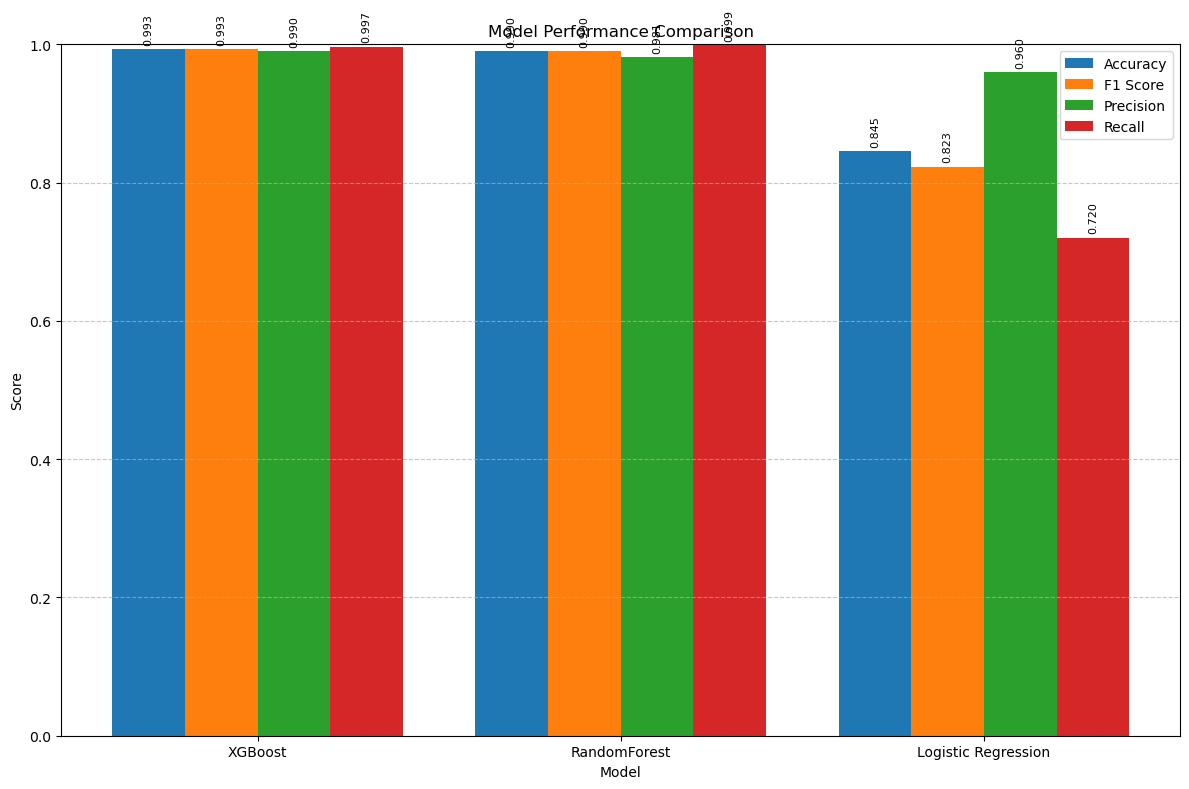

In [17]:
# Find the best model based on test F1 score
best_model_name = max(model_performances, key=lambda x: model_performances[x]['test_f1'])
best_model = model_performances[best_model_name]['model']

print("\nModel Performance Summary:")
for model_name, perf in model_performances.items():
    print(f"\n{model_name}:")
    print(f"  Train Accuracy: {perf['train_accuracy']:.4f}")
    print(f"  Test Accuracy: {perf['test_accuracy']:.4f}")
    print(f"  Train F1: {perf['train_f1']:.4f}")
    print(f"  Test F1: {perf['test_f1']:.4f}")
    print(f"  Train Precision: {perf['train_precision']:.4f}")
    print(f"  Test Precision: {perf['test_precision']:.4f}")
    print(f"  Train Recall: {perf['train_recall']:.4f}")
    print(f"  Test Recall: {perf['test_recall']:.4f}")

print(f"\nBest model: {best_model_name} with Test F1: {model_performances[best_model_name]['test_f1']:.4f}")

# Create a comparison visualization
import matplotlib.pyplot as plt

# Extract model names and metrics
model_names = list(model_performances.keys())
test_f1 = [model_performances[model]['test_f1'] for model in model_names]
test_accuracy = [model_performances[model]['test_accuracy'] for model in model_names]
test_precision = [model_performances[model]['test_precision'] for model in model_names]
test_recall = [model_performances[model]['test_recall'] for model in model_names]

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(model_names))

# Create the bars
bar1 = ax.bar(index, test_accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, test_f1, bar_width, label='F1 Score')
bar3 = ax.bar(index + bar_width*2, test_precision, bar_width, label='Precision')
bar4 = ax.bar(index + bar_width*3, test_recall, bar_width, label='Recall')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width*1.5)
ax.set_xticklabels(model_names)
ax.legend()

plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90, fontsize=8)

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

plt.tight_layout()
plt.show()

In [20]:
import random
import pandas as pd
import csv
from tqdm import tqdm

def generate_recommendations(test_df, G, best_model, features_to_use, max_test_nodes=5):
    """
    Generate recommendations for a limited number of test nodes (default is 5)
    """
    print(f"Generating recommendations for {max_test_nodes} test nodes...")
    recommendations = {}
    
    # Sample a subset of test nodes (limit to 5 nodes)
    test_nodes = random.sample(test_df['source_node'].unique().tolist(), min(max_test_nodes, len(test_df['source_node'].unique())))
    
    for source_node in tqdm(test_nodes):
        # Get all nodes in the graph
        all_nodes = list(G.nodes())
        
        # Create candidate pairs by pairing the source node with all other nodes
        candidates = []
        candidate_nodes = []
        
        # Sample some nodes to evaluate (to avoid checking all nodes)
        sample_nodes = random.sample(all_nodes, min(1000, len(all_nodes)))
        
        for dest_node in sample_nodes:
            if dest_node == source_node:
                continue
                
            # Skip if edge already exists
            if G.has_edge(source_node, dest_node):
                continue
                
            # Add to candidates
            candidate_nodes.append(dest_node)
            
            # Create a row for this pair
            row = {'source_node': source_node, 'destination_node': dest_node}
            candidates.append(row)
        
        if not candidates:
            recommendations[source_node] = []
            continue
            
        # Convert candidates to DataFrame
        candidates_df = pd.DataFrame(candidates)
        
        # Generate features for these candidates
        candidates_features = generate_features(G, candidates_df)
        
        # Select the features used by the model
        X_candidates = candidates_features[features_to_use]
        
        # Predict probabilities
        probs = best_model.predict_proba(X_candidates)
        
        # Get the probabilities of class 1 (connection)
        probs_class1 = probs[:, 1]
        
        # Create a DataFrame with node IDs and their probabilities
        result_df = pd.DataFrame({
            'destination_node': candidate_nodes,
            'probability': probs_class1
        })
        
        # Sort by probability in descending order
        result_df = result_df.sort_values('probability', ascending=False)
        
        # Get top 5 recommendations (you can adjust this if needed)
        top_recommendations = result_df.head(5)['destination_node'].tolist()
        recommendations[source_node] = top_recommendations
    
    return recommendations

def save_recommendations(recommendations, output_file):
    """
    Save recommendations to CSV file
    """
    with open(output_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['source_node', 'recommended_nodes'])
        
        for source_node, rec_nodes in recommendations.items():
            writer.writerow([source_node, ','.join(map(str, rec_nodes))])
    
    print(f"Recommendations saved to {output_file}")

# Only generate recommendations if test_df is available
if test_df is not None:
    output_path = 'recommendations_sample.csv'  # You can name this file as per your preference
    recommendations = generate_recommendations(test_df, G, best_model, final_features, max_test_nodes=5)
    save_recommendations(recommendations, output_path)


Generating recommendations for 5 test nodes...


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:16<00:00, 68549.17it/s]


Finding weakly connected components...
Processing each row...



 20%|████████████████▌                                                                  | 1/5 [01:56<07:45, 116.49s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:05<00:00, 200178.40it/s]


Finding weakly connected components...
Processing each row...



 40%|█████████████████████████████████▌                                                  | 2/5 [02:55<04:08, 82.68s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:05<00:00, 198984.69it/s]


Finding weakly connected components...
Processing each row...



 60%|██████████████████████████████████████████████████▍                                 | 3/5 [03:52<02:21, 71.00s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:05<00:00, 192279.27it/s]


Finding weakly connected components...
Processing each row...



 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [04:12<00:50, 50.99s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:05<00:00, 199105.94it/s]


Finding weakly connected components...
Processing each row...



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:29<00:00, 65.97s/it]

Recommendations saved to recommendations_sample.csv


# evaluate recommandation 

Generating recommendations for 5 test nodes...


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Generating features...
Computing centrality measures...
Computing weights...



100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:06<00:00, 179398.23it/s]


Finding weakly connected components...
Processing each row...



 20%|████████████████▊                                                                   | 1/5 [01:24<05:38, 84.64s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:06<00:00, 188234.64it/s]


Finding weakly connected components...
Processing each row...



 40%|█████████████████████████████████▌                                                  | 2/5 [01:48<02:26, 48.85s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:06<00:00, 189623.03it/s]


Finding weakly connected components...
Processing each row...



 60%|██████████████████████████████████████████████████▍                                 | 3/5 [02:56<01:55, 57.70s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:06<00:00, 185947.28it/s]


Finding weakly connected components...
Processing each row...



 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [03:32<00:48, 48.93s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:05<00:00, 192641.58it/s]


Finding weakly connected components...
Processing each row...



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:53<00:00, 58.61s/it]


Recommendations with metrics saved to recommendations_with_metrics.csv
Metrics visualization saved to recommendation_metrics_visualization.png


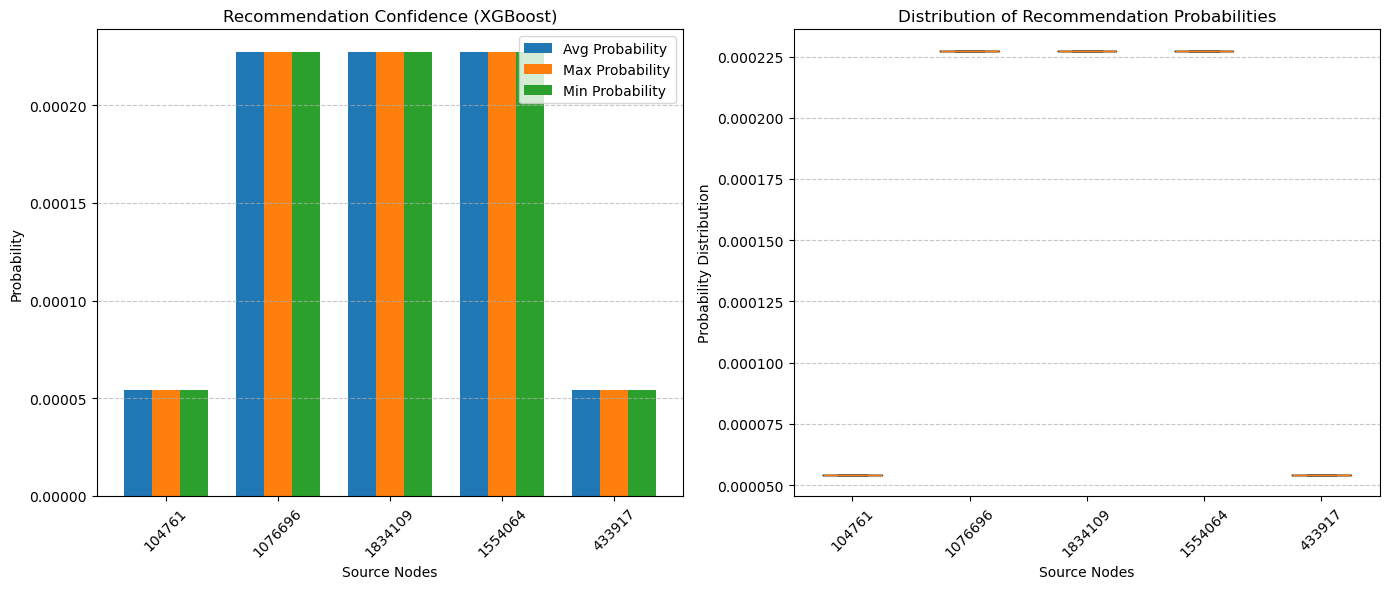


Recommendations generated using XGBoost model:
  Test Accuracy: 0.9932
  Test F1: 0.9932
  Test Precision: 0.9898
  Test Recall: 0.9967


In [23]:
def generate_recommendations_with_metrics(test_df, G, best_model, features_to_use, max_test_nodes=5):
    """
    Generate recommendations for test nodes and display performance metrics
    """
    print(f"Generating recommendations for {max_test_nodes} test nodes...")
    recommendations = {}
    recommendation_metrics = {}
    
    # Sample a subset of test nodes
    test_nodes = random.sample(test_df['source_node'].unique().tolist(), min(max_test_nodes, len(test_df['source_node'].unique())))
    
    for source_node in tqdm(test_nodes):
        # Get all nodes in the graph
        all_nodes = list(G.nodes())
        
        # Create candidate pairs
        candidates = []
        candidate_nodes = []
        
        # Sample some nodes to evaluate
        sample_nodes = random.sample(all_nodes, min(1000, len(all_nodes)))
        
        for dest_node in sample_nodes:
            if dest_node == source_node or G.has_edge(source_node, dest_node):
                continue
                
            # Add to candidates
            candidate_nodes.append(dest_node)
            candidates.append({'source_node': source_node, 'destination_node': dest_node})
        
        if not candidates:
            recommendations[source_node] = []
            recommendation_metrics[source_node] = {}
            continue
            
        # Convert candidates to DataFrame
        candidates_df = pd.DataFrame(candidates)
        
        # Generate features for these candidates
        candidates_features = generate_features(G, candidates_df)
        
        # Select the features used by the model
        X_candidates = candidates_features[features_to_use]
        
        # Predict probabilities
        probs = best_model.predict_proba(X_candidates)
        
        # Get the probabilities of class 1 (connection)
        probs_class1 = probs[:, 1]
        
        # Create a DataFrame with node IDs and their probabilities
        result_df = pd.DataFrame({
            'destination_node': candidate_nodes,
            'probability': probs_class1
        })
        
        # Sort by probability in descending order
        result_df = result_df.sort_values('probability', ascending=False)
        
        # Get top 5 recommendations
        top_recommendations = result_df.head(5)
        
        # Store recommendations and metrics
        recommendations[source_node] = top_recommendations['destination_node'].tolist()
        recommendation_metrics[source_node] = {
            'avg_probability': top_recommendations['probability'].mean(),
            'max_probability': top_recommendations['probability'].max(),
            'min_probability': top_recommendations['probability'].min(),
            'std_probability': top_recommendations['probability'].std()
        }
    
    return recommendations, recommendation_metrics

def save_recommendations_with_metrics(recommendations, metrics, output_file):
    """
    Save recommendations and metrics to CSV file
    """
    with open(output_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['source_node', 'recommended_nodes', 'avg_probability', 'max_probability', 'min_probability', 'std_probability'])
        
        for source_node, rec_nodes in recommendations.items():
            metrics_row = metrics.get(source_node, {})
            writer.writerow([
                source_node, 
                ','.join(map(str, rec_nodes)),
                f"{metrics_row.get('avg_probability', 0):.4f}",
                f"{metrics_row.get('max_probability', 0):.4f}",
                f"{metrics_row.get('min_probability', 0):.4f}",
                f"{metrics_row.get('std_probability', 0):.4f}"
            ])
    
    print(f"Recommendations with metrics saved to {output_file}")

def visualize_recommendation_metrics(metrics, model_name, output_file=None):
    """
    Create visualization of recommendation metrics
    """
    if not metrics:
        print("No metrics to visualize")
        return
        
    # Extract metrics for visualization
    nodes = list(metrics.keys())
    avg_probs = [m['avg_probability'] for m in metrics.values()]
    max_probs = [m['max_probability'] for m in metrics.values()]
    min_probs = [m['min_probability'] for m in metrics.values()]
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Bar chart of average probabilities
    x = np.arange(len(nodes))
    width = 0.25
    
    ax1.bar(x - width, avg_probs, width, label='Avg Probability')
    ax1.bar(x, max_probs, width, label='Max Probability')
    ax1.bar(x + width, min_probs, width, label='Min Probability')
    
    ax1.set_xlabel('Source Nodes')
    ax1.set_ylabel('Probability')
    ax1.set_title(f'Recommendation Confidence ({model_name})')
    ax1.set_xticks(x)
    ax1.set_xticklabels(nodes, rotation=45)
    ax1.legend()
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Plot 2: Distribution of probabilities (boxplot)
    data_to_plot = []
    for node in nodes:
        if 'all_probabilities' in metrics[node]:
            data_to_plot.append(metrics[node]['all_probabilities'])
        else:
            # If we don't have all probabilities, use the summary stats
            data_to_plot.append([
                metrics[node]['min_probability'],
                metrics[node]['avg_probability'],
                metrics[node]['max_probability']
            ])
    
    ax2.boxplot(data_to_plot)
    ax2.set_xlabel('Source Nodes')
    ax2.set_ylabel('Probability Distribution')
    ax2.set_title('Distribution of Recommendation Probabilities')
    ax2.set_xticklabels(nodes, rotation=45)
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file)
        print(f"Metrics visualization saved to {output_file}")
    
    plt.show()

# Modified main execution code
if test_df is not None:
    # Get the best model name and model
    best_model_name = max(model_performances, key=lambda x: model_performances[x]['test_f1'])
    best_model = model_performances[best_model_name]['model']
    
    # Generate recommendations with metrics
    output_path = 'recommendations_with_metrics.csv'
    recommendations, recommendation_metrics = generate_recommendations_with_metrics(
        test_df, G, best_model, final_features, max_test_nodes=5
    )
    
    # Save recommendations with metrics
    save_recommendations_with_metrics(recommendations, recommendation_metrics, output_path)
    
    # Visualize metrics
    visualize_recommendation_metrics(
        recommendation_metrics, 
        best_model_name, 
        output_file='recommendation_metrics_visualization.png'
    )
    
    # Print summary of model used for recommendations
    print(f"\nRecommendations generated using {best_model_name} model:")
    print(f"  Test Accuracy: {model_performances[best_model_name]['test_accuracy']:.4f}")
    print(f"  Test F1: {model_performances[best_model_name]['test_f1']:.4f}")
    print(f"  Test Precision: {model_performances[best_model_name]['test_precision']:.4f}")
    print(f"  Test Recall: {model_performances[best_model_name]['test_recall']:.4f}")

In [25]:
print(recommendation_metrics)

{104761: {'avg_probability': 5.4249667e-05, 'max_probability': 5.424967093858868e-05, 'min_probability': 5.424967093858868e-05, 'std_probability': 4.067384016398501e-12}, 1076696: {'avg_probability': 0.00022744379, 'max_probability': 0.00022744378657080233, 'min_probability': 0.00022744378657080233, 'std_probability': 0.0}, 1834109: {'avg_probability': 0.00022744379, 'max_probability': 0.00022744378657080233, 'min_probability': 0.00022744378657080233, 'std_probability': 0.0}, 1554064: {'avg_probability': 0.00022744379, 'max_probability': 0.00022744378657080233, 'min_probability': 0.00022744378657080233, 'std_probability': 0.0}, 433917: {'avg_probability': 5.4249667e-05, 'max_probability': 5.424967093858868e-05, 'min_probability': 5.424967093858868e-05, 'std_probability': 4.067384016398501e-12}}


In [26]:
source_node = list(recommendation_metrics.keys())[0]  # Example: get the first source node
print(f"Metrics for source node {source_node}:")
print(recommendation_metrics[source_node])


Metrics for source node 104761:
{'avg_probability': 5.4249667e-05, 'max_probability': 5.424967093858868e-05, 'min_probability': 5.424967093858868e-05, 'std_probability': 4.067384016398501e-12}


In [28]:
import json
import numpy as np

# Convert all numpy float types to standard Python float
def convert_to_serializable(obj):
    if isinstance(obj, np.float32) or isinstance(obj, np.float64):
        return float(obj)
    elif isinstance(obj, np.ndarray):  # Convert numpy arrays to lists
        return obj.tolist()
    elif isinstance(obj, dict):  # Recursively convert dictionary values
        return {k: convert_to_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):  # Recursively convert list elements
        return [convert_to_serializable(i) for i in obj]
    return obj  # Return other types as-is

# Assuming recommendation_metrics contains numpy data types
recommendation_metrics_serializable = convert_to_serializable(recommendation_metrics)

# Dump the JSON
print(json.dumps(recommendation_metrics_serializable, indent=4))


{
    "104761": {
        "avg_probability": 5.424966730060987e-05,
        "max_probability": 5.424967093858868e-05,
        "min_probability": 5.424967093858868e-05,
        "std_probability": 4.067384016398501e-12
    },
    "1076696": {
        "avg_probability": 0.00022744378657080233,
        "max_probability": 0.00022744378657080233,
        "min_probability": 0.00022744378657080233,
        "std_probability": 0.0
    },
    "1834109": {
        "avg_probability": 0.00022744378657080233,
        "max_probability": 0.00022744378657080233,
        "min_probability": 0.00022744378657080233,
        "std_probability": 0.0
    },
    "1554064": {
        "avg_probability": 0.00022744378657080233,
        "max_probability": 0.00022744378657080233,
        "min_probability": 0.00022744378657080233,
        "std_probability": 0.0
    },
    "433917": {
        "avg_probability": 5.424966730060987e-05,
        "max_probability": 5.424967093858868e-05,
        "min_probability": 5.4249670

# Generate Recommendations

Generating recommendations for 20 test nodes...


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 79996.76it/s]


Finding weakly connected components...
Processing each row...



  5%|████                                                                              | 1/20 [02:35<49:12, 155.39s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 80825.98it/s]


Finding weakly connected components...
Processing each row...



 10%|████████▏                                                                         | 2/20 [04:40<41:15, 137.55s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 79545.18it/s]


Finding weakly connected components...
Processing each row...



 15%|████████████▍                                                                      | 3/20 [05:23<26:41, 94.19s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:21<00:00, 54019.42it/s]


Finding weakly connected components...
Processing each row...



 20%|████████████████▌                                                                  | 4/20 [06:19<21:10, 79.39s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 80160.55it/s]


Finding weakly connected components...
Processing each row...



 25%|████████████████████▊                                                              | 5/20 [07:52<21:05, 84.33s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:13<00:00, 81940.02it/s]


Finding weakly connected components...
Processing each row...



 30%|████████████████████████▌                                                         | 6/20 [10:29<25:22, 108.77s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 79149.50it/s]


Finding weakly connected components...
Processing each row...



 35%|█████████████████████████████                                                      | 7/20 [11:22<19:38, 90.63s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 78815.16it/s]


Finding weakly connected components...
Processing each row...



 40%|████████████████████████████████▊                                                 | 8/20 [13:54<22:01, 110.11s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 79941.48it/s]


Finding weakly connected components...
Processing each row...



 45%|█████████████████████████████████████▎                                             | 9/20 [15:11<18:17, 99.77s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 79267.81it/s]


Finding weakly connected components...
Processing each row...



 50%|█████████████████████████████████████████                                         | 10/20 [15:55<13:47, 82.70s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:13<00:00, 82786.25it/s]


Finding weakly connected components...
Processing each row...



 55%|█████████████████████████████████████████████                                     | 11/20 [16:34<10:24, 69.40s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 80819.64it/s]


Finding weakly connected components...
Processing each row...



 60%|█████████████████████████████████████████████████▏                                | 12/20 [18:13<10:27, 78.42s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 76798.95it/s]


Finding weakly connected components...
Processing each row...



 65%|████████████████████████████████████████████████████▋                            | 13/20 [21:05<12:27, 106.74s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:17<00:00, 65565.92it/s]


Finding weakly connected components...
Processing each row...



 70%|████████████████████████████████████████████████████████▋                        | 14/20 [22:41<10:21, 103.53s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 79916.57it/s]


Finding weakly connected components...
Processing each row...



 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [23:25<07:06, 85.33s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 79878.36it/s]


Finding weakly connected components...
Processing each row...



 80%|████████████████████████████████████████████████████████████████▊                | 16/20 [25:41<06:43, 100.77s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:13<00:00, 83479.44it/s]


Finding weakly connected components...
Processing each row...



 85%|████████████████████████████████████████████████████████████████████▊            | 17/20 [28:13<05:48, 116.24s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 80139.49it/s]


Finding weakly connected components...
Processing each row...



 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [29:13<03:18, 99.21s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:14<00:00, 80462.23it/s]


Finding weakly connected components...
Processing each row...



 95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [31:44<01:54, 114.73s/it]

Generating features...
Computing centrality measures...
Computing weights...



100%|█████████████████████████████████████████████████████████████████████| 1145880/1145880 [00:13<00:00, 84147.85it/s]


Finding weakly connected components...
Processing each row...



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [34:13<00:00, 102.65s/it]


Recommendations with metrics saved to recommendations_with_metrics__.csv
Metrics visualization saved to recommendation_metrics_visualization.png


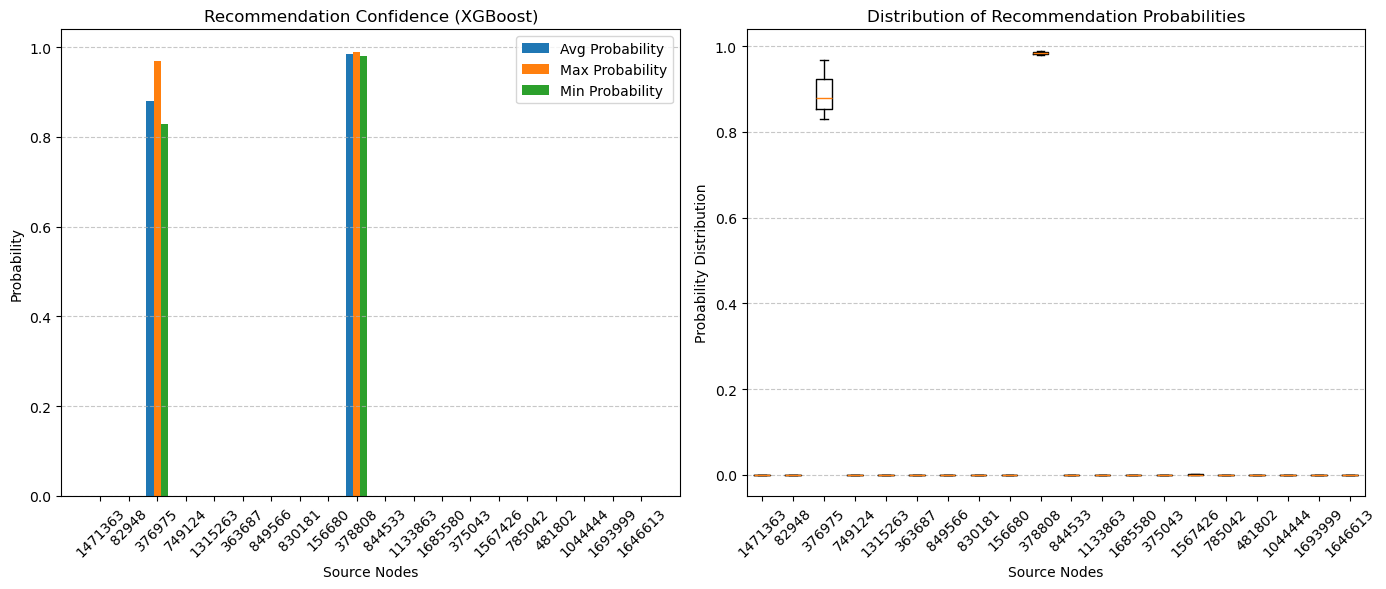


Recommendations generated using XGBoost model:
  Test Accuracy: 0.9932
  Test F1: 0.9932
  Test Precision: 0.9898
  Test Recall: 0.9967


In [32]:
def generate_recommendations_with_metrics(test_df, G, best_model, features_to_use, max_test_nodes=20):
    """
    Generate recommendations for test nodes and display performance metrics
    """
    print(f"Generating recommendations for {max_test_nodes} test nodes...")
    recommendations = {}
    recommendation_metrics = {}
    
    # Sample a subset of test nodes
    test_nodes = random.sample(test_df['source_node'].unique().tolist(), min(max_test_nodes, len(test_df['source_node'].unique())))
    
    for source_node in tqdm(test_nodes):
        # Get all nodes in the graph
        all_nodes = list(G.nodes())
        
        # Create candidate pairs
        candidates = []
        candidate_nodes = []
        
        # Sample some nodes to evaluate
        sample_nodes = random.sample(all_nodes, min(1000, len(all_nodes)))
        
        for dest_node in sample_nodes:
            if dest_node == source_node or G.has_edge(source_node, dest_node):
                continue
                
            # Add to candidates
            candidate_nodes.append(dest_node)
            candidates.append({'source_node': source_node, 'destination_node': dest_node})
        
        if not candidates:
            recommendations[source_node] = []
            recommendation_metrics[source_node] = {}
            continue
            
        # Convert candidates to DataFrame
        candidates_df = pd.DataFrame(candidates)
        
        # Generate features for these candidates
        candidates_features = generate_features(G, candidates_df)
        
        # Select the features used by the model
        X_candidates = candidates_features[features_to_use]
        
        # Predict probabilities
        probs = best_model.predict_proba(X_candidates)
        
        # Get the probabilities of class 1 (connection)
        probs_class1 = probs[:, 1]
        
        # Create a DataFrame with node IDs and their probabilities
        result_df = pd.DataFrame({
            'destination_node': candidate_nodes,
            'probability': probs_class1
        })
        
        # Sort by probability in descending order
        result_df = result_df.sort_values('probability', ascending=False)
        
        # Get top 5 recommendations
        top_recommendations = result_df.head(5)
        
        # Store recommendations and metrics
        recommendations[source_node] = top_recommendations['destination_node'].tolist()
        recommendation_metrics[source_node] = {
            'avg_probability': top_recommendations['probability'].mean(),
            'max_probability': top_recommendations['probability'].max(),
            'min_probability': top_recommendations['probability'].min(),
            'std_probability': top_recommendations['probability'].std()
        }
    
    return recommendations, recommendation_metrics

def save_recommendations_with_metrics(recommendations, metrics, output_file):
    """
    Save recommendations and metrics to CSV file
    """
    with open(output_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['source_node', 'recommended_nodes', 'avg_probability', 'max_probability', 'min_probability', 'std_probability'])
        
        for source_node, rec_nodes in recommendations.items():
            metrics_row = metrics.get(source_node, {})
            writer.writerow([
                source_node, 
                ','.join(map(str, rec_nodes)),
                f"{metrics_row.get('avg_probability', 0):.4f}",
                f"{metrics_row.get('max_probability', 0):.4f}",
                f"{metrics_row.get('min_probability', 0):.4f}",
                f"{metrics_row.get('std_probability', 0):.4f}"
            ])
    
    print(f"Recommendations with metrics saved to {output_file}")

def visualize_recommendation_metrics(metrics, model_name, output_file=None):
    """
    Create visualization of recommendation metrics
    """
    if not metrics:
        print("No metrics to visualize")
        return
        
    # Extract metrics for visualization
    nodes = list(metrics.keys())
    avg_probs = [m['avg_probability'] for m in metrics.values()]
    max_probs = [m['max_probability'] for m in metrics.values()]
    min_probs = [m['min_probability'] for m in metrics.values()]
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Bar chart of average probabilities
    x = np.arange(len(nodes))
    width = 0.25
    
    ax1.bar(x - width, avg_probs, width, label='Avg Probability')
    ax1.bar(x, max_probs, width, label='Max Probability')
    ax1.bar(x + width, min_probs, width, label='Min Probability')
    
    ax1.set_xlabel('Source Nodes')
    ax1.set_ylabel('Probability')
    ax1.set_title(f'Recommendation Confidence ({model_name})')
    ax1.set_xticks(x)
    ax1.set_xticklabels(nodes, rotation=45)
    ax1.legend()
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Plot 2: Distribution of probabilities (boxplot)
    data_to_plot = []
    for node in nodes:
        if 'all_probabilities' in metrics[node]:
            data_to_plot.append(metrics[node]['all_probabilities'])
        else:
            # If we don't have all probabilities, use the summary stats
            data_to_plot.append([
                metrics[node]['min_probability'],
                metrics[node]['avg_probability'],
                metrics[node]['max_probability']
            ])
    
    ax2.boxplot(data_to_plot)
    ax2.set_xlabel('Source Nodes')
    ax2.set_ylabel('Probability Distribution')
    ax2.set_title('Distribution of Recommendation Probabilities')
    ax2.set_xticklabels(nodes, rotation=45)
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file)
        print(f"Metrics visualization saved to {output_file}")
    
    plt.show()

# Modified main execution code
if test_df is not None:
    # Get the best model name and model
    best_model_name = max(model_performances, key=lambda x: model_performances[x]['test_f1'])
    best_model = model_performances[best_model_name]['model']
    
    # Generate recommendations with metrics
    output_path = 'recommendations_with_metrics__.csv'
    recommendations, recommendation_metrics = generate_recommendations_with_metrics(
        test_df, G, best_model, final_features, max_test_nodes=20
    )
    
    # Save recommendations with metrics
    save_recommendations_with_metrics(recommendations, recommendation_metrics, output_path)
    
    # Visualize metrics
    visualize_recommendation_metrics(
        recommendation_metrics, 
        best_model_name, 
        output_file='recommendation_metrics_visualization.png'
    )
    
    # Print summary of model used for recommendations
    print(f"\nRecommendations generated using {best_model_name} model:")
    print(f"  Test Accuracy: {model_performances[best_model_name]['test_accuracy']:.4f}")
    print(f"  Test F1: {model_performances[best_model_name]['test_f1']:.4f}")
    print(f"  Test Precision: {model_performances[best_model_name]['test_precision']:.4f}")
    print(f"  Test Recall: {model_performances[best_model_name]['test_recall']:.4f}")

In [33]:
import json
import numpy as np

# Convert all numpy float types to standard Python float
def convert_to_serializable(obj):
    if isinstance(obj, np.float32) or isinstance(obj, np.float64):
        return float(obj)
    elif isinstance(obj, np.ndarray):  # Convert numpy arrays to lists
        return obj.tolist()
    elif isinstance(obj, dict):  # Recursively convert dictionary values
        return {k: convert_to_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):  # Recursively convert list elements
        return [convert_to_serializable(i) for i in obj]
    return obj  # Return other types as-is

# Assuming recommendation_metrics contains numpy data types
recommendation_metrics_serializable = convert_to_serializable(recommendation_metrics)

# Dump the JSON
print(json.dumps(recommendation_metrics_serializable, indent=4))


{
    "1471363": {
        "avg_probability": 0.00022744378657080233,
        "max_probability": 0.00022744378657080233,
        "min_probability": 0.00022744378657080233,
        "std_probability": 0.0
    },
    "82948": {
        "avg_probability": 0.00022744378657080233,
        "max_probability": 0.00022744378657080233,
        "min_probability": 0.00022744378657080233,
        "std_probability": 0.0
    },
    "376975": {
        "avg_probability": 0.8789966702461243,
        "max_probability": 0.9679485559463501,
        "min_probability": 0.8290375471115112,
        "std_probability": 0.05556324124336243
    },
    "749124": {
        "avg_probability": 0.00022744378657080233,
        "max_probability": 0.00022744378657080233,
        "min_probability": 0.00022744378657080233,
        "std_probability": 0.0
    },
    "1315263": {
        "avg_probability": 0.00022744378657080233,
        "max_probability": 0.00022744378657080233,
        "min_probability": 0.000227443786570802

In [34]:
print(recommendation_metrics)

{1471363: {'avg_probability': 0.00022744379, 'max_probability': 0.00022744378657080233, 'min_probability': 0.00022744378657080233, 'std_probability': 0.0}, 82948: {'avg_probability': 0.00022744379, 'max_probability': 0.00022744378657080233, 'min_probability': 0.00022744378657080233, 'std_probability': 0.0}, 376975: {'avg_probability': 0.8789967, 'max_probability': 0.9679485559463501, 'min_probability': 0.8290375471115112, 'std_probability': 0.05556324124336243}, 749124: {'avg_probability': 0.00022744379, 'max_probability': 0.00022744378657080233, 'min_probability': 0.00022744378657080233, 'std_probability': 0.0}, 1315263: {'avg_probability': 0.00022744379, 'max_probability': 0.00022744378657080233, 'min_probability': 0.00022744378657080233, 'std_probability': 0.0}, 363687: {'avg_probability': 5.4249667e-05, 'max_probability': 5.424967093858868e-05, 'min_probability': 5.424967093858868e-05, 'std_probability': 4.067384016398501e-12}, 849566: {'avg_probability': 0.00022744379, 'max_probab